1. Using scipy to import channel data into python

In [2]:
import scipy.io
import matplotlib.pyplot as plt
import numpy as np

In [3]:
matA = scipy.io.loadmat('./data/TES _DATA_NOV_6th/2018.11.06_23.59.20_1.A.mat')
matB = scipy.io.loadmat('./data/TES _DATA_NOV_6th/2018.11.06_23.59.20_1.B.mat')


2. Zero data, Plots portion of the raw data

In [4]:
matA['T1'].shape

(1, 16777216)

In [16]:
x1 = matA['T1'][0,:]
y1 = matA['Y1'][0,:]

7944.634735226631


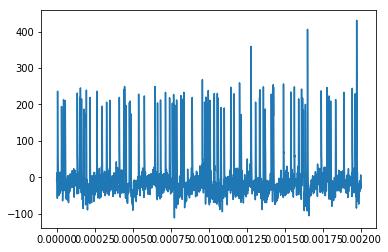

In [17]:
y1 = y1.astype(float)
print(np.mean(y1))
y1 -= np.mean(y1)

plt.plot(x1[:10000],y1[:10000])
plt.show()

# 6. Let's use Scipy's Peak Finder

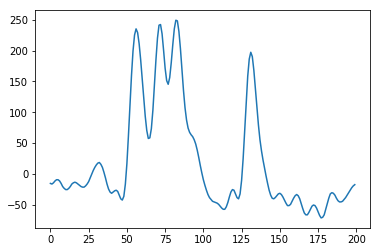

In [18]:
xs1p = x1[2150:2350]
ys1p = y1[2150:2350]
plt.plot(ys1p)
plt.show()

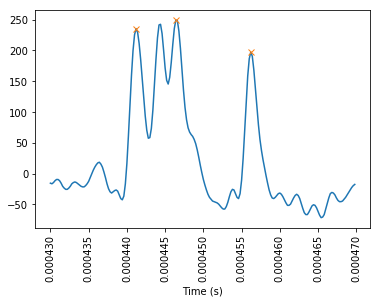

In [21]:
from scipy.signal import find_peaks

#look for peaks above 1 photon threshold and with horizontal distance of peak width????
# 100 samples, time difference is 
peaks, _ = find_peaks(ys1p, height=50,distance=15) #peaks are the x indices

# plot graph with detected peaks over it, convert to us
plt.plot(xs1p,ys1p)
plt.plot(xs1p[peaks], ys1p[peaks], "x")

#formatting
plt.xticks(rotation='vertical')
#plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.xlabel("Time (s)")
plt.show()

# Prominence

Another way to think about peaks is this notion of "prominence". Prominence is defined by looking for the lowest value on the left and right sides of the peak (over a certain window). The prominence is, then, the differene between the peak height and max(left_lowest,right_lowest). By setting a prominence value, we can eliminate peaks that are above the height threshold, but are just random noise local maxima.

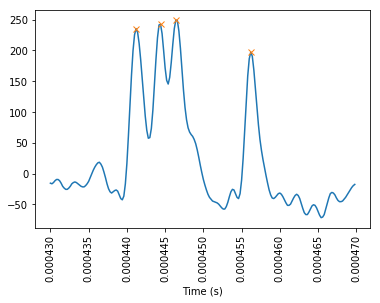

In [32]:
from scipy.signal import find_peaks

#decrease the distance to 10, but set a "prominence" value of 50
peaks, _ = find_peaks(ys1p, height=50,distance=10,prominence=50) #peaks are the x indices

# plot graph with detected peaks over it, convert to us
plt.plot(xs1p,ys1p)
plt.plot(xs1p[peaks], ys1p[peaks], "x")

#formatting
plt.xticks(rotation='vertical')
#plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.xlabel("Time (s)")
plt.show()

Was the above behavior correct? if we decrease the distance to 10, the middle peak is also detected

## 6.2 Let's try another spot

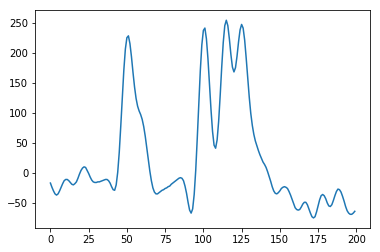

In [39]:
xsmp = x1[7000:7200]
ysmp = y1[7000:7200]
plt.plot(ysmp)
plt.show()

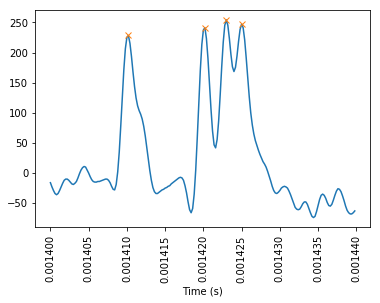

(4,)

In [40]:
#decrease the distance to 10, but set a "prominence" value of 50
peaks2, _ = find_peaks(ysmp, height=50,distance=10,prominence=50) #peaks are the x indices

# plot graph with detected peaks over it
plt.plot(xsmp,ysmp)
plt.plot(xsmp[peaks2], ysmp[peaks2], "x")

#formatting
plt.xticks(rotation='vertical')
#plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.xlabel("Time (s)")
plt.show()
peaks.shape

## 6.3 Let's run this on a big portion of dataset

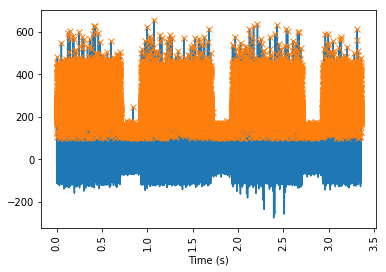

(101801,)

In [53]:
16777216

x1mass = x1
y1mass = y1

peaks, _ = find_peaks(y1mass, height=100,distance=10,prominence=50) #peaks are the x indices

# plot graph with detected peaks over it
plt.plot(x1mass,y1mass)
plt.plot(x1mass[peaks], y1mass[peaks], "x")

#formatting
plt.xticks(rotation='vertical')
#plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.xlabel("Time (s)")
plt.show()
peaks.shape

Histogram the peak heights

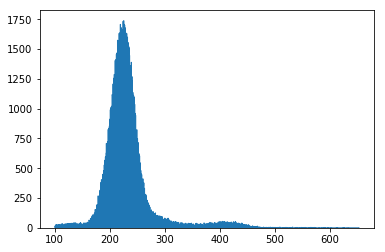

In [56]:
peak_heights = y1mass[peaks]
plt.hist(peak_heights, bins=1000, log=False,histtype='step')
plt.show()

This is the OPO channel and it looks like the min height of single photons should actually be around 150

# Future Work

When we find peaks using scipy's peak finder specifying a prominence, we actually have access to the left and right base values. To simulate a rising edge event style peak detector, we can filter out peaks that have a low prominence from the left side.